In [1]:
# DataFrame
import pandas as pd
from tqdm import tqdm_notebook, tnrange



# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM,Input
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.layers import LSTM, Dense, Embedding, Bidirectional,GlobalMaxPool1D
from keras.layers import TimeDistributed
from keras.optimizers import Adam,Nadam
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
filepath = 'ModelCheckpoint/Bi_LSTM_Attn_Elmo.{epoch:02d}-{val_acc:.3f}.hdf5'

/Users/subir/anaconda3/envs/DeepLearning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

INFO:tensorflow:Using /var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules to cache modules.


2019-03-13 10:09:31,883 : INFO : Using /var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules to cache modules.


INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


2019-03-13 10:09:31,886 : INFO : Downloading TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


INFO:tensorflow:Downloading https://tfhub.dev/google/elmo/2: 30.35MB


2019-03-13 10:09:49,430 : INFO : Downloading https://tfhub.dev/google/elmo/2: 30.35MB


INFO:tensorflow:Downloading https://tfhub.dev/google/elmo/2: 100.35MB


2019-03-13 10:10:06,020 : INFO : Downloading https://tfhub.dev/google/elmo/2: 100.35MB


INFO:tensorflow:Downloading https://tfhub.dev/google/elmo/2: 160.35MB


2019-03-13 10:10:21,170 : INFO : Downloading https://tfhub.dev/google/elmo/2: 160.35MB


INFO:tensorflow:Downloading https://tfhub.dev/google/elmo/2: 220.35MB


2019-03-13 10:10:36,957 : INFO : Downloading https://tfhub.dev/google/elmo/2: 220.35MB


INFO:tensorflow:Downloading https://tfhub.dev/google/elmo/2: 290.35MB


2019-03-13 10:10:53,361 : INFO : Downloading https://tfhub.dev/google/elmo/2: 290.35MB


INFO:tensorflow:Downloading https://tfhub.dev/google/elmo/2: 330.35MB


2019-03-13 10:11:09,992 : INFO : Downloading https://tfhub.dev/google/elmo/2: 330.35MB


INFO:tensorflow:Downloaded https://tfhub.dev/google/elmo/2, Total size: 357.40MB


2019-03-13 10:11:15,139 : INFO : Downloaded https://tfhub.dev/google/elmo/2, Total size: 357.40MB


INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


2019-03-13 10:11:15,142 : INFO : Downloaded TF-Hub Module 'https://tfhub.dev/google/elmo/2'.


INFO:tensorflow:Initialize variable module/aggregation/scaling:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/scaling


2019-03-13 10:11:15,610 : INFO : Initialize variable module/aggregation/scaling:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/scaling


INFO:tensorflow:Initialize variable module/aggregation/weights:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/weights


2019-03-13 10:11:15,617 : INFO : Initialize variable module/aggregation/weights:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/weights


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_0


2019-03-13 10:11:15,625 : INFO : Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_0


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_1:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_1


2019-03-13 10:11:15,632 : INFO : Initialize variable module/bilm/CNN/W_cnn_1:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_1


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_2:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_2


2019-03-13 10:11:15,643 : INFO : Initialize variable module/bilm/CNN/W_cnn_2:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_2


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_3:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_3


2019-03-13 10:11:15,650 : INFO : Initialize variable module/bilm/CNN/W_cnn_3:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_3


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_4:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_4


2019-03-13 10:11:15,660 : INFO : Initialize variable module/bilm/CNN/W_cnn_4:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_4


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_5:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_5


2019-03-13 10:11:15,667 : INFO : Initialize variable module/bilm/CNN/W_cnn_5:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_5


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_6:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_6


2019-03-13 10:11:15,677 : INFO : Initialize variable module/bilm/CNN/W_cnn_6:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_6


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_0:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_0


2019-03-13 10:11:15,683 : INFO : Initialize variable module/bilm/CNN/b_cnn_0:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_0


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_1:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_1


2019-03-13 10:11:15,692 : INFO : Initialize variable module/bilm/CNN/b_cnn_1:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_1


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_2:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_2


2019-03-13 10:11:15,698 : INFO : Initialize variable module/bilm/CNN/b_cnn_2:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_2


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_3:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_3


2019-03-13 10:11:15,704 : INFO : Initialize variable module/bilm/CNN/b_cnn_3:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_3


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_4:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_4


2019-03-13 10:11:15,712 : INFO : Initialize variable module/bilm/CNN/b_cnn_4:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_4


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_5:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_5


2019-03-13 10:11:15,718 : INFO : Initialize variable module/bilm/CNN/b_cnn_5:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_5


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_6:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_6


2019-03-13 10:11:15,728 : INFO : Initialize variable module/bilm/CNN/b_cnn_6:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_6


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/W_carry:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_carry


2019-03-13 10:11:15,734 : INFO : Initialize variable module/bilm/CNN_high_0/W_carry:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/W_transform:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_transform


2019-03-13 10:11:15,742 : INFO : Initialize variable module/bilm/CNN_high_0/W_transform:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/b_carry:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_carry


2019-03-13 10:11:15,749 : INFO : Initialize variable module/bilm/CNN_high_0/b_carry:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/b_transform:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_transform


2019-03-13 10:11:15,759 : INFO : Initialize variable module/bilm/CNN_high_0/b_transform:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/W_carry:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_carry


2019-03-13 10:11:15,766 : INFO : Initialize variable module/bilm/CNN_high_1/W_carry:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/W_transform:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_transform


2019-03-13 10:11:15,774 : INFO : Initialize variable module/bilm/CNN_high_1/W_transform:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/b_carry:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_carry


2019-03-13 10:11:15,780 : INFO : Initialize variable module/bilm/CNN_high_1/b_carry:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/b_transform:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_transform


2019-03-13 10:11:15,786 : INFO : Initialize variable module/bilm/CNN_high_1/b_transform:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_proj/W_proj:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/W_proj


2019-03-13 10:11:15,792 : INFO : Initialize variable module/bilm/CNN_proj/W_proj:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/W_proj


INFO:tensorflow:Initialize variable module/bilm/CNN_proj/b_proj:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/b_proj


2019-03-13 10:11:15,798 : INFO : Initialize variable module/bilm/CNN_proj/b_proj:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/b_proj


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


2019-03-13 10:11:15,805 : INFO : Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


2019-03-13 10:11:15,812 : INFO : Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


2019-03-13 10:11:15,819 : INFO : Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


2019-03-13 10:11:15,826 : INFO : Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


2019-03-13 10:11:15,833 : INFO : Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


2019-03-13 10:11:15,840 : INFO : Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


2019-03-13 10:11:15,847 : INFO : Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


2019-03-13 10:11:15,854 : INFO : Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


2019-03-13 10:11:15,861 : INFO : Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


2019-03-13 10:11:15,868 : INFO : Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


2019-03-13 10:11:15,876 : INFO : Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


2019-03-13 10:11:15,883 : INFO : Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/char_embed:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/char_embed


2019-03-13 10:11:15,890 : INFO : Initialize variable module/bilm/char_embed:0 from checkpoint b'/var/folders/5m/h_g_92_s1d11s4pd5cbhs48m0000gn/T/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/char_embed


In [3]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [4]:
train=pd.read_csv('./data/train_E6oV3lV.csv')
test=pd.read_csv('./data/test_tweets_anuFYb8.csv')

In [5]:
train.head()
train=train.sample(frac=1)

In [6]:
combi = train.append(test, ignore_index=True,sort=False)

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [8]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [9]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [10]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('#',' Hashtag ')

In [12]:
train.shape , test.shape ,combi.shape

((31962, 3), (17197, 2), (49159, 4))

In [13]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [thankful, for, knowledge, Hashtag, thankful, ...
1                               [Hashtag, father, day]
2    [thankful, for, being, able, learn, Hashtag, t...
3    [haha, wow, for, using, the, word, amp, the, e...
4    [and, his, racism, could, fuel, the, power, ne...
Name: tidy_tweet, dtype: object

In [14]:
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer()
lmtzr = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [lmtzr.lemmatize(i) for i in x]) #lemmatize 
tokenized_tweet.head()

0    [thank, for, knowledg, hashtag, thank, hashtag...
1                               [hashtag, father, day]
2    [thank, for, be, abl, learn, hashtag, thank, h...
3    [haha, wow, for, use, the, word, amp, the, equ...
4    [and, hi, racism, could, fuel, the, power, nee...
Name: tidy_tweet, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

/Users/subir/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/subir/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


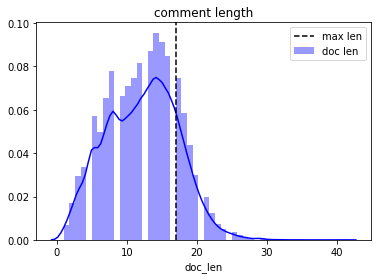

In [16]:
#visualize word distribution
import seaborn as sns
combi['doc_len'] = combi['tidy_tweet'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(combi['doc_len'].mean() + combi['doc_len'].std()).astype(int)
sns.distplot(combi['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()

In [17]:
df_train=combi[:len(train)]
df_test=combi[len(train):]

In [18]:
df_train.shape ,df_test.shape

((31962, 5), (17197, 5))

In [19]:
df_train.head()

,id,label,tweet,tidy_tweet,doc_len
0,11095,0.0,i am thankful for knowledge. #thankful #positi...,thank for knowledg hashtag thank hashtag posit,7
1,9837,0.0,@user #father's day !!,hashtag father day,3
2,25705,0.0,i am thankful for being able to learn. #thankf...,thank for be abl learn hashtag thank hashtag p...,9
3,27667,1.0,haha wow. @user is a for using the n-word &am...,haha wow for use the word amp the equival arab...,14
4,25519,1.0,@user @user and his racism could fuel the powe...,and hi racism could fuel the power need light ...,15


In [20]:
df_train.label.value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

In [21]:
df_test.drop('label',1,inplace=True)

/Users/subir/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
df_test.head()

,id,tweet,tidy_tweet,doc_len
31962,31963,#studiolife #aislife #requires #passion #dedic...,hashtag studiolif hashtag aislif hashtag requi...,15
31963,31964,@user #white #supremacists want everyone to s...,hashtag white hashtag supremacist want everyon...,16
31964,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal your hashtag acn hashtag altways...,12
31965,31966,is the hp and the cursed child book up for res...,the and the cur child book for reserv alreadi ...,18
31966,31967,"3rd #bihday to my amazing, hilarious #nephew...",hashtag bihday amaz hilari hashtag nephew eli ...,14


In [23]:
list_train = [df_train[i:i+100] for i in range(0,df_train.shape[0],100)]
list_test = [df_test[i:i+100] for i in range(0,df_test.shape[0],100)]

In [ ]:
# Extract ELMo embeddings
elmo_train = [elmo_vectors(x['tidy_tweet']) for x in list_train]
elmo_test = [elmo_vectors(x['tidy_tweet']) for x in list_test]

In [ ]:
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(df_train.tidy_tweet)
vocab_size = len(tokenizer.word_index)
print("Total words", vocab_size)

In [27]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.tidy_tweet), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.tidy_tweet), maxlen=SEQUENCE_LENGTH)

CPU times: user 914 ms, sys: 9.04 ms, total: 923 ms
Wall time: 933 ms


In [28]:
print(x_train.shape)

(31962, 30)


In [29]:
EMBEDDING_FILE = '/Users/subir/WordEmbeddings/glove.840B.300d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]


In [33]:
word_index = tokenizer.word_index
nb_words = min(MAX_FEATURES, len(word_index))+1
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= MAX_FEATURES: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
        
print(embedding_matrix.shape)

(31218, 300)


In [34]:
encoder = LabelEncoder()
encoder.fit(df_train.label.tolist())
y_train = encoder.transform(df_train.label.tolist())
y_train = y_train.reshape(-1,1)
print("y_train",y_train.shape)

y_train (31962, 1)


In [35]:
embedding_layer = Embedding(nb_words, embed_size, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [36]:
from keras.engine.topology import Layer
import keras.backend as K
from keras import initializers, regularizers, constraints, optimizers, layers
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [86]:
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2,return_sequences=True)))
model.add(TimeDistributed(Dense(100, use_bias=True)))
model.add(Attention(SEQUENCE_LENGTH))
model.add(Dense(100,activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           9365400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 30, 200)           320800    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 100)           20100     
_________________________________________________________________
attention_2 (Attention)      (None, 100)               130       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total para

In [87]:
def binary_focal_loss(gamma=2., alpha=.25):
    """
    Binary form of focal loss.
      FL(p_t) = -alpha * (1 - p_t)**gamma * log(p_t)
      where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def binary_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred:  A tensor resulting from a sigmoid
        :return: Output tensor.
        """
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

        epsilon = K.epsilon()
        # clip to prevent NaN's and Inf's
        pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
        pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)

        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) \
               -K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))

    return binary_focal_loss_fixed

In [88]:
from keras import backend as K
import tensorflow as tf
model.compile(optimizer='nadam',metrics=['accuracy'],loss=[binary_focal_loss(gamma=2., alpha=1.)])

In [89]:
callbacks = [ReduceLROnPlateau(monitor='val_acc', patience=5, cooldown=0,verbose=1,factor=0.5),
            TensorBoard(log_dir='./Graph',batch_size=BATCH_SIZE, write_graph=True, write_images=True),
            ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')]

In [90]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=50,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=callbacks,class_weight=class_weights)

Train on 25569 samples, validate on 6393 samples
Epoch 1/50
13952/25569 [===============>..............] - ETA: 46s - loss: 0.0772 - acc: 0.0770

KeyboardInterrupt: 

In [82]:
def decode_sentiment(score):
    if float(score)>0.5:
        return 1
    else:
        return 0
def predict(row):
  
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([row['tidy_tweet']]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score)
    row['label']=label
    return row

In [83]:
from tqdm import tqdm ,tqdm_pandas
new_test = df_test.apply(predict,1)

In [84]:
new_test.head()

,id,tweet,tidy_tweet,doc_len,label
31962,31963,#studiolife #aislife #requires #passion #dedic...,hashtag studiolif hashtag aislif hashtag requi...,15,0
31963,31964,@user #white #supremacists want everyone to s...,hashtag white hashtag supremacist want everyon...,16,1
31964,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal your hashtag acn hashtag altways...,12,0
31965,31966,is the hp and the cursed child book up for res...,the and the cur child book for reserv alreadi ...,18,0
31966,31967,"3rd #bihday to my amazing, hilarious #nephew...",hashtag bihday amaz hilari hashtag nephew eli ...,14,0


In [85]:
new_test.label.value_counts()

0    16087
1     1110
Name: label, dtype: int64

In [78]:
new_test.drop(['tweet','tidy_tweet','doc_len'],1,inplace=True)

In [79]:
new_test.to_csv('attn_fast.csv',index=False)